In [102]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import mean_squared_error, accuracy_score
import IPython.display as ipd

from src import utils


In [2]:
# Load metadata and features.
tracks = utils.load('data/fma_metadata/tracks.csv')
genres = utils.load('data/fma_metadata/genres.csv')
features = utils.load('data/fma_metadata/features.csv')
echonest = utils.load('data/fma_metadata/echonest.csv')

np.testing.assert_array_equal(features.index, tracks.index)
assert echonest.index.isin(tracks.index).all()

tracks.shape, genres.shape, features.shape, echonest.shape

((106574, 52), (163, 4), (106574, 518), (13129, 249))

In [3]:
echonest_tracks = tracks.loc[echonest.index]

In [4]:
features_echonest = echonest['echonest'][['audio_features', 'temporal_features']].join(features.loc[echonest.index])

/Users/alextsai/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 3 on the right)
  warnings.warn(msg, UserWarning)


In [197]:
features_echonest.shape

(13129, 750)

In [198]:
tracks['track'].genre_top.isnull()

track_id
2         False
3         False
5         False
10        False
20         True
          ...  
155316    False
155317    False
155318    False
155319    False
155320     True
Name: genre_top, Length: 106574, dtype: bool

In [150]:
features_echonest

audio_features                                                    \
           acousticness danceability    energy instrumentalness  liveness   
track_id                                                                    
2              0.416675     0.675894  0.634476         0.010628  0.177647   
3              0.374408     0.528643  0.817461         0.001851  0.105880   
5              0.043567     0.745566  0.701470         0.000697  0.373143   
10             0.951670     0.658179  0.924525         0.965427  0.115474   
134            0.452217     0.513238  0.560410         0.019443  0.096567   
...                 ...          ...       ...              ...       ...   
124857         0.007592     0.790364  0.719288         0.853114  0.720715   
124862         0.041498     0.843077  0.536496         0.865151  0.547949   
124863         0.000124     0.609686  0.895136         0.846624  0.632903   
124864         0.327576     0.574426  0.548327         0.452867  0.075928   
124911         0.993606     0.499339  0.050622         0.945677  0.095965   

                                        temporal_features            ...  \
         speechiness    tempo   valence               000       001  ...   
track_id                                                             ...   
2           0.159310  165.922  0.576661          0.877233  0.588911  ...   
3           0.461818  126.957  0.269240          0.534429  0.537414  ...   
5           0.124595  100.260  0.621661          0.548093  0.720192  ...   
10          0.032985  111.562  0.963590          0.311404  0.711402  ...   
134         0.525519  114.290  0.894072          0.610849  0.569169  ...   
...              ...      ...       ...               ...       ...  ...   
124857      0.082550  141.332  0.890461          0.717013  0.686557  ...   
124862      0.074001  101.975  0.476845          0.673395  0.846995  ...   
124863      0.051517  129.996  0.496667          0.842368  0.719091  ...   
124864      0.033388  142.009  0.569274          0.346748  0.311817  ...   
124911      0.065189  119.965  0.204652          0.319693  0.164967  ...   

           tonnetz                            zcr                      \
               std       std       std   kurtosis       max      mean   
track_id                                                                
2         0.054125  0.012226  0.012111   5.758890  0.459473  0.085629   
3         0.063831  0.014212  0.017740   2.824694  0.466309  0.084578   
5         0.040730  0.012691  0.014759   6.808415  0.375000  0.053114   
10        0.074358  0.017952  0.013921  21.434212  0.452148  0.077515   
134       0.058766  0.016322  0.015819   4.731087  0.419434  0.064370   
...            ...       ...       ...        ...       ...       ...   
124857    0.044130  0.017932  0.019123  11.869940  0.405273  0.049399   
124862    0.050790  0.019464  0.014612   4.255357  0.298828  0.040642   
124863    0.044322  0.018616  0.017603   7.419688  0.344727  0.047787   
124864    0.097448  0.020286  0.020809   5.421509  0.283691  0.049346   
124911    0.131945  0.031642  0.026394  39.036884  0.180664  0.015955   

                                                  
            median       min      skew       std  
track_id                                          
2         0.071289  0.000000  2.089872  0.061448  
3         0.063965  0.000000  1.716724  0.069330  
5         0.041504  0.000000  2.193303  0.044861  
10        0.071777  0.000000  3.542325  0.040800  
134       0.050781  0.000000  1.806106  0.054623  
...            ...       ...       ...       ...  
124857    0.038086  0.000000  2.820800  0.042830  
124862    0.025391  0.000000  1.789954  0.040908  
124863    0.041504  0.001953  1.961021  0.035228  
124864    0.040039  0.000000  1.949840  0.035900  
124911    0.014160  0.000000  4.302468  0.007725  

[13129 rows x 750 columns]

In [56]:
X = features
y = tracks['track']['listens']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

ValueError: Found input variables with inconsistent numbers of samples: [49598, 106574]

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)

In [14]:
np.sqrt(mean_squared_error(y_test, y_pred))

7363.688044893913

In [17]:
model = Lasso()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/Users/alextsai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2433691698682.7236, tolerance: 538208724.2997044
  positive)


In [18]:
np.sqrt(mean_squared_error(y_test, y_pred))

7360.377516168099

In [20]:
model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [21]:
np.sqrt(mean_squared_error(y_test, y_pred))

7362.185622926905

In [59]:
X = features[tracks['track'].genre_top.isnull().map({False: True, True: False})]
y = tracks['track'].genre_top.dropna()

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [180]:
trees = [100, 200, 300, 400 ,500, 600, 700, 800, 900, 1000]
depths = [10, 20, 30 ,40, 50]
features_nums = [20,40,60,80,100]

In [93]:
scores = []


In [94]:
for feature in features:
    #max_depth 40, max_features = 60, n_estimators = 400
    clf = RandomForestClassifier(n_estimators=, max_depth=5, max_features = feature, random_state = 42) 
    print(feature)
    clf.fit(X_train, y_train)
    print(feature)
    y_pred = clf.predict(X_test)
    print(feature)
    scores.append([accuracy_score(y_test, y_pred)])
    print(feature)

20
20
20
20
40
40
40
40
60
60
60
60
80
80
80
80
100
100
100
100


In [97]:
scores

[[0.5089516129032258],
 [0.5127419354838709],
 [0.5182258064516129],
 [0.5160483870967741],
 [0.5201612903225806]]

In [98]:
clf = RandomForestClassifier(n_estimators=400, max_depth=40, max_features = 60, random_state = 42) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
scores.append([accuracy_score(y_test, y_pred)])


In [99]:
accuracy_score(y_test, y_pred)

0.6414516129032258

In [30]:
y = tracks['track'].genre_top

In [34]:
tracks['track'].genre_top.isnull()

track_id
2         False
3         False
5         False
10        False
20         True
          ...  
155316    False
155317    False
155318    False
155319    False
155320     True
Name: genre_top, Length: 106574, dtype: bool

In [ ]:
X = features[tracks['track'].genre_top.isnull().map({False: True, True: False})]
y = tracks['track'].genre_top.dropna()

In [5]:
X = features_echonest[tracks['track'].genre_top.isnull().map({False: True, True: False})]
y = echonest_tracks['track'].genre_top.dropna()

/Users/alextsai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [201]:
echonest_scores = []

In [202]:
more_depths = [100,150,200,250,300]

In [183]:
for tree in trees:
    #max_depth 40, max_features = 80, n_estimators = 400
    clf = RandomForestClassifier(n_estimators = 500, max_features = 80, random_state = 42) 
    print(tree)
    clf.fit(X_train, y_train)
    print(tree)
    y_pred = clf.predict(X_test)
    print(tree)
    echonest_scores.append([accuracy_score(y_test, y_pred)])
    print(tree)

100
100
100
100
200
200
200
200
300
300
300
300
400
400
400
400
500
500
500
500
600
600
600
600
700
700
700
700
800
800
800
800
900
900
900
900
1000
1000
1000
1000


Text(0.5, 1.0, 'max features')

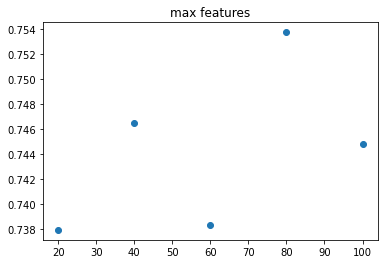

In [162]:
plt.scatter(features_nums, echonest_scores)
plt.title('max features')

Text(0.5, 1.0, 'Number of Trees')

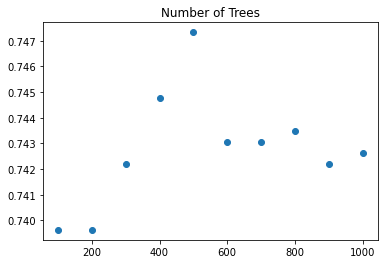

In [184]:
plt.scatter(trees, echonest_scores)
plt.title('Number of Trees')

In [10]:
clf = RandomForestClassifier(n_estimators = 500, max_features = 80, random_state = 42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7447627191107311

In [123]:
X_train.columns[np.argsort(clf.feature_importances_)][-20:]

MultiIndex([(             'mfcc',             'skew'),
            ('spectral_contrast',             'mean'),
            ('spectral_contrast',           'median'),
            ('spectral_contrast',           'median'),
            ('temporal_features',              '217'),
            (             'mfcc',              'std'),
            (   'audio_features', 'instrumentalness'),
            ('temporal_features',              '110'),
            ('temporal_features',              '098'),
            ('temporal_features',              '127'),
            ('spectral_contrast',           'median'),
            (   'audio_features',     'acousticness'),
            (             'mfcc',              'max'),
            (   'audio_features',      'speechiness'),
            (             'mfcc',             'mean'),
            ('temporal_features',              '200'),
            (             'mfcc',              'std'),
            (             'mfcc',           'median'),
          

In [117]:
X_train.temporal_features

,000,001,002,003,004,005,006,007,008,009,...,214,215,216,217,218,219,220,221,222,223
track_id,,,,,,,,,,,,,,,,,,,,,
319,0.658454,0.329683,0.269644,0.283715,0.254720,0.298798,0.294937,0.275637,0.196948,0.237591,...,-0.038536,0.315413,0.341124,0.252355,0.117428,0.07519,6.28054,6.20535,11.611980,193.915527
13555,0.551183,0.571245,0.440840,0.261751,0.323269,0.219874,0.271008,0.284751,0.291956,0.400148,...,-1.087370,0.942458,0.275624,0.255330,0.032625,0.06830,3.18018,3.11188,7.862091,112.812355
324,0.545776,0.592027,0.457130,0.444959,0.453174,0.329050,0.282718,0.322865,0.440888,0.531576,...,-0.639844,1.586755,0.354111,0.261925,0.305140,0.06290,8.87537,8.81247,11.506408,166.361755
49131,0.301600,0.353578,0.537078,0.377015,0.488238,0.235954,0.324448,0.485989,0.304820,0.352242,...,-2.483046,11.865436,0.311313,0.248440,0.052773,0.06608,3.23787,3.17179,5.872226,59.041500
29959,0.276336,0.615289,0.227599,0.536858,0.491097,0.524266,0.503068,0.208162,0.306516,0.254316,...,-7.816087,107.577599,0.277097,0.313830,0.008478,0.08735,0.68789,0.60054,0.031139,2.091169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16511,0.648060,0.335353,0.577992,0.234526,0.401173,0.353150,0.351759,0.434421,0.347459,0.502647,...,-2.747168,9.974177,0.590207,0.429340,0.389524,0.08086,5.47401,5.39315,4.610830,29.039820
50404,0.600943,0.696204,0.478498,0.349762,0.445143,0.412700,0.474796,0.411525,0.357857,0.410525,...,-2.439276,6.652677,0.271919,0.219930,0.011188,0.11025,0.93447,0.82422,1.138953,2.045324
44770,0.202046,0.138044,0.909182,0.164465,0.303238,0.395111,0.191485,0.340709,0.096806,0.420196,...,-2.317790,5.581927,0.416322,0.336330,0.159080,0.06381,6.14104,6.07723,7.049558,86.628616


In [51]:
(y_test == 'Classical').sum()

69

In [93]:
accuracy_df = pd.DataFrame(index = ['Classical','Rock','Jazz','Electronic','Blues','Hip-Hop','Old-Time / Historic', 'Pop','Folk','International','Instrumental','Experimental'])
accuracy_df

""
Classical
Rock
Jazz
Electronic
Blues
Hip-Hop
Old-Time / Historic
Pop
Folk
International


In [68]:
accuracies = []

In [69]:
accuracies.append(np.mean(y_pred[y_test == 'Classical'] == 'Classical'))

In [70]:
accuracies.append(np.mean(y_pred[y_test == 'Rock'] == 'Rock'))

In [71]:
accuracies.append(np.mean(y_pred[y_test == 'Jazz'] == 'Jazz'))

In [72]:
accuracies.append(np.mean(y_pred[y_test == 'Electronic'] == 'Electronic'))

In [73]:
accuracies.append(np.mean(y_pred[y_test == 'Blues'] == 'Blues'))

In [74]:
accuracies.append(np.mean(y_pred[y_test == 'Hip-Hop'] == 'Hip-Hop'))

In [75]:
accuracies.append(np.mean(y_pred[y_test == 'Old-Time / Historic'] == 'Old-Time / Historic'))

In [76]:
accuracies.append(np.mean(y_pred[y_test == 'Pop'] == 'Pop'))

In [77]:
accuracies.append(np.mean(y_pred[y_test == 'Folk'] == 'Folk'))

In [78]:
accuracies.append(np.mean(y_pred[y_test == 'International'] == 'International'))

In [85]:
accuracies.append(0)
accuracies.append(0)

In [94]:
accuracy_df['Accuracy'] = accuracies

accuracy_df.sort_values('Accuracy', ascending = False)

,Accuracy
Old-Time / Historic,0.964706
Rock,0.921488
Electronic,0.797373
Classical,0.797101
Hip-Hop,0.623377
Folk,0.610860
International,0.105263
Blues,0.058824
Jazz,0.031746
Pop,0.022472


In [97]:
y_pred[y_test == 'Pop'] 

array(['Rock', 'Folk', 'Rock', 'Folk', 'Electronic', 'Rock', 'Folk',
       'Rock', 'Electronic', 'Rock', 'Rock', 'Electronic', 'Rock', 'Rock',
       'Rock', 'Rock', 'Electronic', 'Rock', 'Electronic', 'Rock', 'Rock',
       'Rock', 'Folk', 'Rock', 'Rock', 'Electronic', 'Folk', 'Rock',
       'Folk', 'Rock', 'Rock', 'Rock', 'Electronic', 'Rock', 'Electronic',
       'Rock', 'Electronic', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Electronic', 'Rock', 'Rock', 'Folk', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Hip-Hop', 'Rock', 'Folk', 'Rock', 'Rock', 'Folk',
       'Rock', 'Folk', 'Electronic', 'Folk', 'Rock', 'Rock', 'Pop',
       'Rock', 'Rock', 'Folk', 'Rock', 'Rock', 'Rock', 'Electronic',
       'Folk', 'Electronic', 'Rock', 'Electronic', 'Folk', 'Rock',
       'Electronic', 'Rock', 'Rock', 'Electronic', 'Electronic', 'Rock',
       'Rock', 'Rock', 'Electronic', 'Folk', 'Electronic', 'Pop'],
      dtype=object)

In [100]:
y_pred[y_test == 'Blues']

array(['Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Blues', 'Electronic',
       'Rock', 'Rock', 'Folk', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock'], dtype=object)

In [98]:
y_pred[y_test == 'Experimental']

array(['Rock', 'Folk', 'Folk'], dtype=object)

In [99]:
y_pred[y_test == 'Instrumental']

array(['Rock', 'Rock', 'Rock', 'Rock', 'Electronic', 'Rock', 'Electronic',
       'Folk', 'Rock', 'Folk', 'Electronic', 'Electronic', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Folk', 'Rock', 'Rock'],
      dtype=object)

In [22]:
np.unique(y_pred, return_counts=True)

(array(['Blues', 'Classical', 'Electronic', 'Folk', 'Hip-Hop',
        'International', 'Jazz', 'Old-Time / Historic', 'Pop', 'Rock'],
       dtype=object),
 array([   1,   62,  581,  215,  166,    4,    2,   86,    2, 1220]))

In [87]:
y_test.value_counts() 

Rock                   968
Electronic             533
Hip-Hop                231
Folk                   221
Pop                     89
Old-Time / Historic     85
Classical               69
Jazz                    63
International           38
Instrumental            22
Blues                   17
Experimental             3
Spoken                   0
Soul-RnB                 0
Easy Listening           0
Country                  0
Name: genre_top, dtype: int64

In [24]:
y_test.shape

(2339,)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x = ))

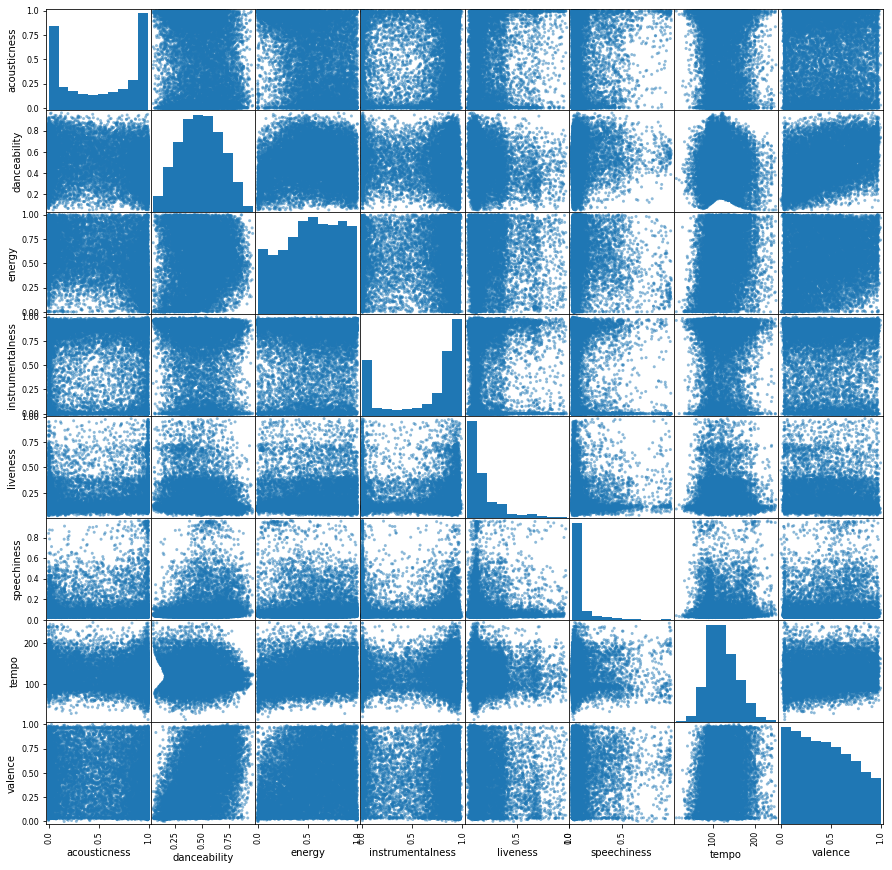

In [24]:
pd.plotting.scatter_matrix(echonest['echonest']['audio_features'], figsize = (15,15));

NameError: name 'gb' is not defined

In [7]:
gb_clf = GradientBoostingClassifier(learning_rate = .01,n_estimators = 500, max_depth = 20, random_state = 42)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)

In [9]:
accuracy_score(y_test, y_pred)

0.6994442069260368

In [131]:
X_echo = echonest.echonest.audio_features[tracks['track'].genre_top.isnull().map({False: True, True: False})]
y_echo = echonest_tracks['track'].genre_top.dropna()

/Users/alextsai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [134]:
X_train_echo, X_test_echo, y_train_echo, y_test_echo = train_test_split(X_echo, y_echo)

In [136]:
clf_echo = RandomForestClassifier(n_estimators = 100, random_state = 42)
clf_echo.fit(X_train_echo, y_train_echo)
y_pred_echo = clf_echo.predict(X_test_echo)
accuracy_score(y_test_echo, y_pred_echo)

0.6451474989311672

In [141]:
X_echo = echonest.echonest[['audio_features','temporal_features']][tracks['track'].genre_top.isnull().map({False: True, True: False})]
y_echo = echonest_tracks['track'].genre_top.dropna()

/Users/alextsai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [142]:
X_train_echo, X_test_echo, y_train_echo, y_test_echo = train_test_split(X_echo, y_echo)

In [144]:
clf_echo = RandomForestClassifier(n_estimators = 500, random_state = 42)
clf_echo.fit(X_train_echo, y_train_echo)
y_pred_echo = clf_echo.predict(X_test_echo)
accuracy_score(y_test_echo, y_pred_echo)

0.7310816588285592